**Can we use remote sensing datasets to investigate the impact of wind extremes on carbon cycling in forests?**

Past studies have shown that disturbances such as fire can have a significant impact on carbon cycling, yet the impact of wind extremes on carbon cycling is largely unknown.  Using Hurricanes Irma and Maria (September - October 2017) as a case study, I investigate the feasibility of observing changes in aboveground biomass after intense storm events through vegetation optical depth, a measure of canopy density from microwave remote sensing.  I compare changes in aboveground biomass to maximum wind speeds during the hurricane to investigate the relationship between wind speeds and biomass loss.  

Datasets:
- [Wind speeds from ERA5 (European Center for Medium-Range Weather Forecasts)](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5)
- [Vegetation Optical Depth (VOD) from SMOS (European Space Agency)](https://earth.esa.int/web/guest/missions/esa-operational-eo-missions/smos)

Project by Jashvina Devadoss, December 2019

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import cartopy 
import cartopy.crs as ccrs

**Define the area of interest in the Caribbean**

In [2]:
lonmin = -85
lonmax = -65
latmin = 17
latmax = 30

### Load Vegetation Optical Depth (VOD) from SMOS  August 30 - September 2, 2017. 

This time point shows the pre-hurricane canopy density.

SMOS has a revisit time of three days, but because of missing data points due to radio frequency interference in this region, four days of data are merged in order to have fuller spatial coverage.  

Merge the datasets by date and subset by location.

In [3]:
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20170830T000000_20170830T235959_105_002_8.DBL.nc
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20170831T000000_20170831T235959_105_002_8.DBL.nc
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20170901T000000_20170901T235959_105_002_8.DBL.nc
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20170902T000000_20170902T235959_105_002_8.DBL.nc

File ‘SM_RE06_MIR_CDF3SA_20170830T000000_20170830T235959_105_002_8.DBL.nc’ already there; not retrieving.

File ‘SM_RE06_MIR_CDF3SA_20170831T000000_20170831T235959_105_002_8.DBL.nc’ already there; not retrieving.

File ‘SM_RE06_MIR_CDF3SA_20170901T000000_20170901T235959_105_002_8.DBL.nc’ already there; not retrieving.

File ‘SM_RE06_MIR_CDF3SA_20170902T000000_20170902T235959_105_002_8.DBL.nc’ already there; not retrieving.



In [4]:
aug30 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20170830T000000_20170830T235959_105_002_8.DBL.nc')
aug31 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20170831T000000_20170831T235959_105_002_8.DBL.nc')
sep01 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20170901T000000_20170901T235959_105_002_8.DBL.nc')
sep02 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20170902T000000_20170902T235959_105_002_8.DBL.nc')


In [5]:
sep = aug31.combine_first(sep01)
sep = sep.combine_first(sep02)
sep = sep.combine_first(aug30)

In [6]:
(np.min(sep.Optical_Thickness_Nad), np.max(sep.Optical_Thickness_Nad))

(<xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(-1.134519, dtype=float32), <xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(2.009784, dtype=float32))

### Load Vegetation Optical Depth (VOD) from SMOS October 15 - 18, 2017 
This time point shows the post-hurricane canopy density.

Merge by date and subset by location.

In [7]:
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20171015T000000_20171015T235959_105_001_8.DBL.nc
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20171016T000000_20171016T235959_105_001_8.DBL.nc
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20171017T000000_20171017T235959_105_001_8.DBL.nc
! wget -nc https://zenodo.org/record/3564711/files/SM_RE06_MIR_CDF3SA_20171018T000000_20171018T235959_105_001_8.DBL.nc

File ‘SM_RE06_MIR_CDF3SA_20171015T000000_20171015T235959_105_001_8.DBL.nc’ already there; not retrieving.

File ‘SM_RE06_MIR_CDF3SA_20171016T000000_20171016T235959_105_001_8.DBL.nc’ already there; not retrieving.

File ‘SM_RE06_MIR_CDF3SA_20171017T000000_20171017T235959_105_001_8.DBL.nc’ already there; not retrieving.

File ‘SM_RE06_MIR_CDF3SA_20171018T000000_20171018T235959_105_001_8.DBL.nc’ already there; not retrieving.



In [8]:
oct15 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20171015T000000_20171015T235959_105_001_8.DBL.nc')
oct16 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20171016T000000_20171016T235959_105_001_8.DBL.nc')
oct17 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20171017T000000_20171017T235959_105_001_8.DBL.nc')
oct18 = xr.open_dataset('SM_RE06_MIR_CDF3SA_20171018T000000_20171018T235959_105_001_8.DBL.nc')

In [9]:
oc = oct18.combine_first(oct17)
oc = oc.combine_first(oct16)
oc = oc.combine_first(oct15)

In [10]:
(np.min(oc.Optical_Thickness_Nad), np.max(oc.Optical_Thickness_Nad))


(<xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(-1.441634, dtype=float32), <xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(2.152307, dtype=float32))

Text(0.5, 1.0, 'Vegetation Optical Depth\n October 15-18, 2017')

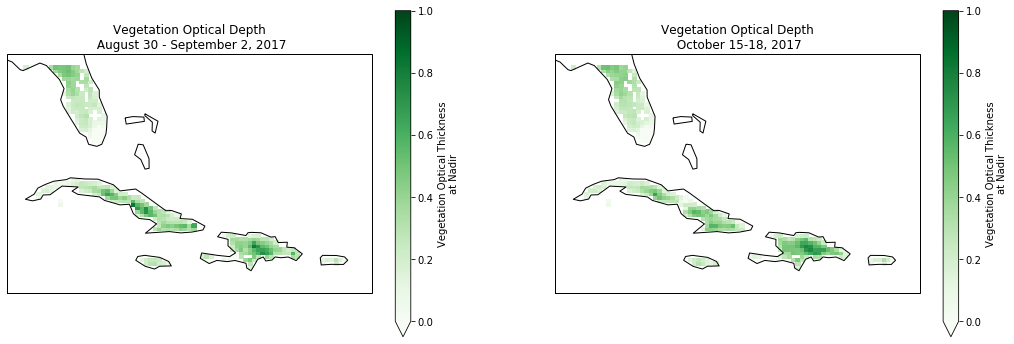

In [11]:
fig, axes = plt.subplots(figsize = (18, 6), ncols = 2, subplot_kw={'projection': ccrs.PlateCarree()})
axes[0].coastlines()
axes[1].coastlines()

sepsub = sep.sel(lat = slice(latmin, latmax), lon = slice(lonmin, lonmax))
sepsub.Optical_Thickness_Nad.plot(cmap = 'Greens', vmin = 0, vmax = 1, ax = axes[0])
axes[0].set_title('Vegetation Optical Depth\n August 30 - September 2, 2017')

octsub = oc.sel(lat = slice(latmin, latmax), lon = slice(lonmin, lonmax))
octsub.Optical_Thickness_Nad.plot(vmin = 0, vmax = 1, cmap = 'Greens', ax = axes[1])
axes[1].set_title('Vegetation Optical Depth\n October 15-18, 2017')

By merging daily SMOS captures over four days, we were able to achieve good coverage of the region of interest.

### Calculate the difference in VOD between the pre- and post-hurricane time points


**Calculate percent change**

Text(0.5, 1.0, 'Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')

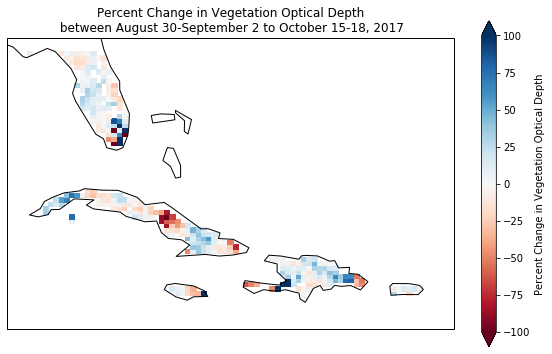

In [12]:
pc = ((octsub.Optical_Thickness_Nad - sepsub.Optical_Thickness_Nad) / np.abs(sepsub.Optical_Thickness_Nad)) * 100


fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
pcplt = pc.plot(cmap = 'RdBu', vmin = -100, vmax = 100, 
                cbar_kwargs={"label": "Percent Change in Vegetation Optical Depth"})
ax.set_title('Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')


**Normalize the difference by the standard deviation, to get a dataset with standard deviation = 1**

Text(0.5, 1.0, 'Difference in Vegetation Optical Depth\n August 30-September 2 to October 15-18, 2017')

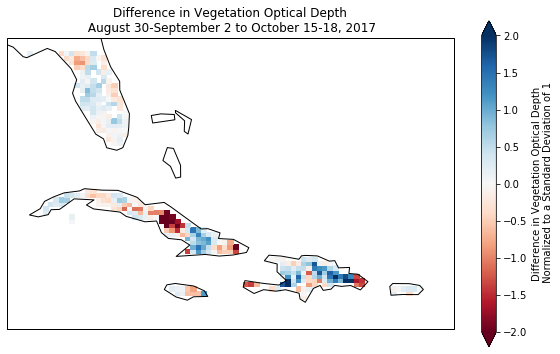

In [13]:
diff = (octsub.Optical_Thickness_Nad - sepsub.Optical_Thickness_Nad)

std1 = diff / np.std(diff)

fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
std1.plot(vmin = -2, vmax = 2, cmap = 'RdBu', cbar_kwargs={"label": "Difference in Vegetation Optical Depth\n Normalized to a Standard Deviation of 1"})
ax.set_title('Difference in Vegetation Optical Depth\n August 30-September 2 to October 15-18, 2017')

In [14]:
np.std(std1)

<xarray.DataArray 'Optical_Thickness_Nad' ()>
array(1., dtype=float32)

Interestingly, we are able to see a loss in canopy thickness after the storm, particularly in Cuba.  This shows that this dataset could be useful for tracking hurricane-related changes in aboveground biomass.

### Load ERA5 dataset

1. Change longitude to a -180, 180 scale

2. Subset the data by time and location

3. Calculate 10-meter wind speed  

In [15]:
! wget -nc https://zenodo.org/record/3564711/files/20170901_20171031_ERA5_wind_daily.nc

File ‘20170901_20171031_ERA5_wind_daily.nc’ already there; not retrieving.



Load the data by increasing latitude (latitude decreases in the original format).

In [16]:
ds = xr.open_dataset('20170901_20171031_ERA5_wind_daily.nc').sortby('latitude')
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 61)
Coordinates:
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time       (time) datetime64[ns] 2017-09-01T10:00:00 ... 2017-10-31T10:00:00
Data variables:
    u100       (time, latitude, longitude) float32 1.124378 ... -0.51964307
    v100       (time, latitude, longitude) float32 0.14495775 ... 0.115119494
    u10        (time, latitude, longitude) float32 0.79586196 ... -0.3886385
    v10        (time, latitude, longitude) float32 0.18632203 ... 0.008336663
    fg10       (time, latitude, longitude) float32 8.905949 ... 7.170212
    i10fg      (time, latitude, longitude) float32 8.781494 ... 7.1809444
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-09 14:53:07 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [17]:
ds['longitude'] = xr.where(ds['longitude'] > 180, ds['longitude'] - 360, ds['longitude'])

In [18]:
ds = ds.sel(latitude = slice(latmin, latmax), longitude = slice(lonmin, lonmax))
ds = ds.sel(time = slice('2017-09-01', '2017-10-18'))

In [19]:
def wind_speed(u, v):
    return np.sqrt(u**2 + v**2)

ds['ws10'] = wind_speed(ds.u10, ds.v10)
ds.ws10.attrs['units'] = 'm s**-1'
ds.ws10.attrs['long_name'] = '10 meter wind speed'

### Calculate the maximum wind speed between September 1 and October 18, 2017

1. Check the minimum wind speed (all values are positive)


2. Make an array of zeroes shaped like the wind speed DataArray.  This array will be populated by the maximum wind speeds.  Since all wind speeds are greater than zero, zero makes sense as the initial comparison value for the loop.


3. Get the maximum wind speed by looping through each time point.  The maximum wind speed for each pixel is stored in the array created in Step 2.  At each step of the loop, the maximum wind speed value for each pixel is updated by comparing between (1) the current time point and (2) the array of the maximum wind speed at each pixel for all previous time points.

In [20]:
np.min(ds.ws10) > 0

<xarray.DataArray 'ws10' ()>
array(True)

In [21]:
ds['ws10max'] = xr.zeros_like(ds.ws10.isel(time = 1))
ds.ws10max.attrs['units'] = 'm s**-1'
ds.ws10max.attrs['long_name'] = 'maximum 10 meter wind speed'

This ufunction, fmax, performs element-wise operations, getting the pixel-by-pixel maximum.

In [22]:
for date in range(1,len(ds.time)):
    ds['ws10max'] = np.fmax(ds.ws10max, ds.ws10.isel(time = date))

Text(0.5, 1.0, 'Maximum Daily 10-meter Wind Speed\n September 1 - October 18, 2017')

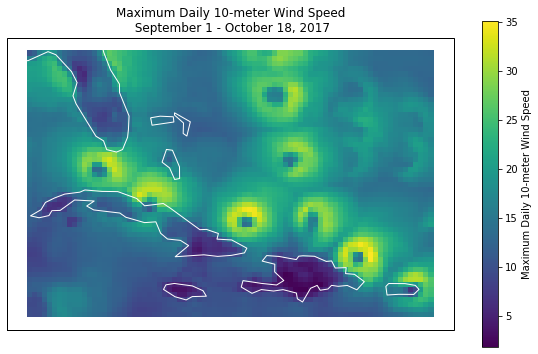

In [23]:
fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(color = 'w')
ds.ws10max.plot(cbar_kwargs={'label': 'Maximum Daily 10-meter Wind Speed'})
ax.set_title('Maximum Daily 10-meter Wind Speed\n September 1 - October 18, 2017')

**Hourly dataset**

As shown above, large gaps in data exist in the daily time points because of the speed at which the hurricanes moved.  

The hourly dataset is incorporated for more continuous data.  

Because the hourly dataset is large (18.4 GB), an intermediate output has been saved to reduce processing time.  The intermediate output for the hourly dataset is equivalent to the daily dataset plotted above, except that the maximum windspeed is computed for all of the hourly timepoints.

Below, the option is given to process the raw hourly data if the intermediate data file is not found.

In [24]:
! wget -nc https://zenodo.org/record/3564711/files/20170901_20171031_ERA5_wind_hourly_maxWS.nc

File ‘20170901_20171031_ERA5_wind_hourly_maxWS.nc’ already there; not retrieving.



In [25]:
try:
    ds_hourly = xr.open_dataset('20170901_20171031_ERA5_wind_hourly_maxWS.nc').sortby('latitude').sel(latitude = slice(latmin, latmax), 
                                                                                                      longitude = slice(lonmin, lonmax))
except IOError:
    ! wget -nc https://zenodo.org/record/3564711/files/20170901_20171031_ERA5_wind_hourly.nc
        
    ds_hourly = xr.open_dataset('20170901_20171031_ERA5_wind_daily.nc').sortby('latitude')
    
    ds_hourly['longitude'] = xr.where(ds_hourly['longitude'] > 180, ds_hourly['longitude'] - 360, ds_hourly['longitude'])
    
    ds_hourly = ds_hourly.sel(latitude = slice(latmin, latmax), longitude = slice(lonmin, lonmax))
    ds_hourly = ds_hourly.sel(time = slice('2017-09-01', '2017-10-18'))
    
    ds_hourly['ws10'] = wind_speed(ds_hourly.u10, ds_hourly.v10)
    ds_hourly.ws10.attrs['units'] = 'm s**-1'
    ds_hourly.ws10.attrs['long_name'] = '10 meter wind speed'
    
    ds_hourly['ws10max'] = xr.zeros_like(ds_hourly.ws10.isel(time = 1))
    ds_hourly.ws10max.attrs['units'] = 'm s**-1'
    ds_hourly.ws10max.attrs['long_name'] = 'maximum 10 meter wind speed'
    
    for date in range(1,len(ds_hourly.time)):
        ds_hourly['ws10max'] = np.fmax(ds_hourly.ws10max, ds_hourly.ws10.isel(time = date))

Text(0.5, 1.0, 'Maximum Hourly 10-meter Wind Speed\n September 1 - October 18, 2017')

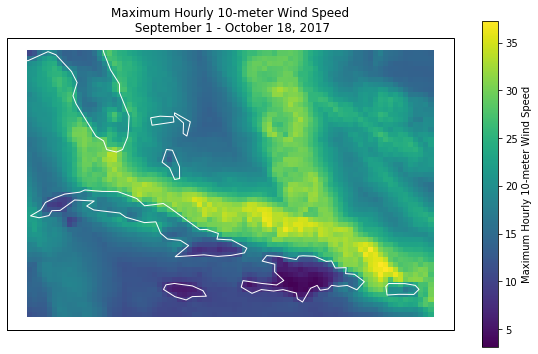

In [26]:
fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(color = 'w')
ds_hourly.ws10max.plot(cbar_kwargs={'label': 'Maximum Hourly 10-meter Wind Speed'})
ax.set_title('Maximum Hourly 10-meter Wind Speed\n September 1 - October 18, 2017')

### Align the grids for the datasets.

 - SMOS grid: 0.20 degree resolution longitude, 0.259 degree resolution latitude
 - ERA5 grid: 0.25 degree resolution longitude and latitude

interp_like: Interpolate data from one dataset along the coordinates of another.  Interpolate SMOS to match the ERA5 grid.

In [27]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 53, longitude: 81, time: 48)
Coordinates:
  * longitude  (longitude) float64 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float64 17.0 17.25 17.5 17.75 ... 29.5 29.75 30.0
  * time       (time) datetime64[ns] 2017-09-01T10:00:00 ... 2017-10-18T10:00:00
Data variables:
    u100       (time, latitude, longitude) float32 -5.6287336 ... 4.6306167
    v100       (time, latitude, longitude) float32 3.7703063 ... 1.6151701
    u10        (time, latitude, longitude) float32 -5.1501665 ... 4.318677
    v10        (time, latitude, longitude) float32 3.434556 ... 1.5067255
    fg10       (time, latitude, longitude) float32 9.620712 ... 8.971926
    i10fg      (time, latitude, longitude) float32 9.368036 9.204065 ... 8.01956
    ws10       (time, latitude, longitude) float32 6.1903462 ... 4.573969
    ws10max    (latitude, longitude) float32 9.711176 9.406879 ... 12.829986
Attributes:
    Conventions:  CF-1.6
    history:      2019-

In [28]:
pc = pc.rename({'lon': 'longitude',
                    'lat': 'latitude'})
diff = diff.rename({'lon': 'longitude',
                    'lat': 'latitude'})
std1 = std1.rename({'lon': 'longitude',
                    'lat': 'latitude'})

In [29]:
ds['VOD_diff'] = diff.interp_like(ds)
ds.VOD_diff.attrs['long_name'] = 'Difference in VOD between August 30 - September 2, 2017 and October 15-18, 2017'


ds['VOD_pc'] = pc.interp_like(ds)
ds.VOD_pc.attrs['long_name'] = 'Percent change in VOD between August 30 - September 2, 2017 and October 15-18, 2017'

ds['VOD_std1'] = std1.interp_like(ds)
ds.VOD_std1.attrs['long_name'] = 'Difference in VOD August 30 - September 2, 2017 and October 15-18, 2017 normalized to standard deviation = 1'
ds.VOD_std1

<xarray.DataArray 'VOD_std1' (latitude: 53, longitude: 81)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float64 17.0 17.25 17.5 17.75 ... 29.5 29.75 30.0
Attributes:
    long_name:  Difference in VOD August 30 - September 2, 2017 and October 1...

**Visualize the data before and after interpolation.**

Text(0.5, 1.0, 'After Interpolation: Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')

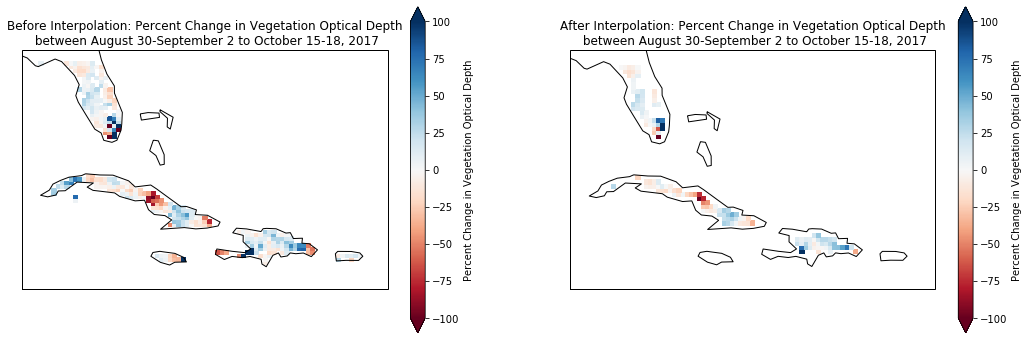

In [30]:
fig, axes = plt.subplots(figsize = (18, 6), ncols = 2, subplot_kw={'projection': ccrs.PlateCarree()})
axes[0].coastlines()
axes[1].coastlines()

pc.plot(ax = axes[0], vmin = -100, vmax = 100, cmap = 'RdBu', 
                cbar_kwargs={"label": "Percent Change in Vegetation Optical Depth"})
axes[0].set_title('Before Interpolation: Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')


ds.VOD_pc.plot(ax = axes[1], vmin = -100, vmax = 100, cmap = 'RdBu',
              cbar_kwargs={'label': 'Percent Change in Vegetation Optical Depth'}) 
axes[1].set_title('After Interpolation: Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')


Coarser resolution can be observed in the right-hand figure.  It also seems that there are more pixels with missing data, particularly on the coastal areas of the islands, and in Florida.

In [31]:
ds['ws10max_hourly'] = ds_hourly['ws10max']
ds.ws10max_hourly.attrs['units'] = 'm s**-1'
ds.ws10max_hourly.attrs['long_name'] = 'maximum hourly 10 meter wind speed'

In [32]:
ds

<xarray.Dataset>
Dimensions:         (latitude: 53, longitude: 81, time: 48)
Coordinates:
  * longitude       (longitude) float64 -85.0 -84.75 -84.5 ... -65.25 -65.0
  * latitude        (latitude) float64 17.0 17.25 17.5 17.75 ... 29.5 29.75 30.0
  * time            (time) datetime64[ns] 2017-09-01T10:00:00 ... 2017-10-18T10:00:00
Data variables:
    u100            (time, latitude, longitude) float32 -5.6287336 ... 4.6306167
    v100            (time, latitude, longitude) float32 3.7703063 ... 1.6151701
    u10             (time, latitude, longitude) float32 -5.1501665 ... 4.318677
    v10             (time, latitude, longitude) float32 3.434556 ... 1.5067255
    fg10            (time, latitude, longitude) float32 9.620712 ... 8.971926
    i10fg           (time, latitude, longitude) float32 9.368036 ... 8.01956
    ws10            (time, latitude, longitude) float32 6.1903462 ... 4.573969
    ws10max         (latitude, longitude) float32 9.711176 ... 12.829986
    VOD_diff        (lat

In [33]:
len(ds.ws10max) == len(ds.VOD_pc)

True

In [34]:
df = ds.ws10max.to_dataframe()
df = df.join(ds.ws10max_hourly.to_series())
df = df.join(ds.VOD_pc.to_series())
df = df.join(ds.VOD_diff.to_series())
df = df.join(ds.VOD_std1.to_series())
df = df[np.logical_not(np.isnan(df).any(axis=1))]
df.head()

ws10max  ws10max_hourly      VOD_pc  VOD_diff  VOD_std1
latitude longitude                                                           
18.50    -72.00      2.159603        3.137115  102.857681  0.086100  0.837186
         -71.00      2.533251        3.524468  -13.918825 -0.052327 -0.508793
         -70.25      3.302494        5.188635    6.977178  0.025104  0.244095
         -68.75     13.699134       15.176998  -38.182646 -0.129213 -1.256396
18.75    -72.00      2.130841        3.417211   76.592596  0.054885  0.533668

### Compare the change in Vegetation Optical Depth to wind speeds
Negative values for change in VOD indicate a loss of canopy cover after the storm.

Text(0.5, 0, 'Maximum Daily 10 meter wind speed (m/s)')

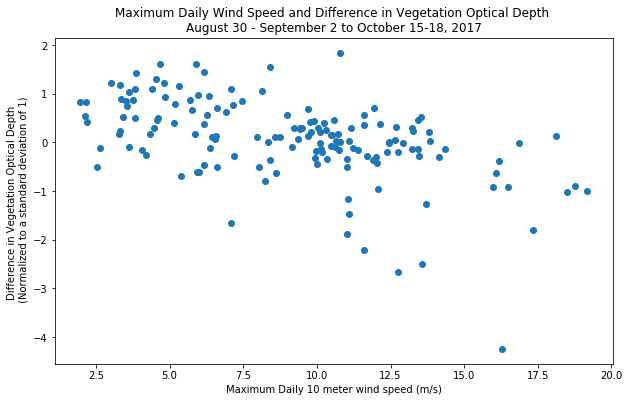

In [35]:
plt.figure(figsize = (10, 6))
plt.scatter(df.ws10max, df.VOD_std1)
plt.title('Maximum Daily Wind Speed and Difference in Vegetation Optical Depth \nAugust 30 - September 2 to October 15-18, 2017')
plt.ylabel('Difference in Vegetation Optical Depth \n (Normalized to a standard deviation of 1)')
plt.xlabel('Maximum Daily 10 meter wind speed (m/s)')


Text(0.5, 0, 'Maximum Hourly 10 meter wind speed (m/s)')

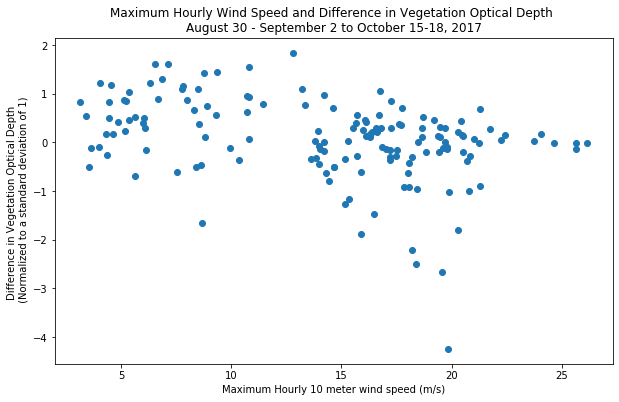

In [36]:
plt.figure(figsize = (10, 6))
plt.scatter(df.ws10max_hourly, df.VOD_std1)
plt.title('Maximum Hourly Wind Speed and Difference in Vegetation Optical Depth \nAugust 30 - September 2 to October 15-18, 2017')
plt.ylabel('Difference in Vegetation Optical Depth \n (Normalized to a standard deviation of 1)')
plt.xlabel('Maximum Hourly 10 meter wind speed (m/s)')

#### Compute Pearson correlation coefficient.  

No significant linear relationship is observed between vegetation optical depth and wind speed.  


In [37]:
np.corrcoef(df.ws10max, df.VOD_std1, rowvar = False)

array([[ 1.        , -0.51175221],
       [-0.51175221,  1.        ]])

In [38]:
np.corrcoef(df.ws10max_hourly, df.VOD_std1, rowvar = False)

array([[ 1.        , -0.36291824],
       [-0.36291824,  1.        ]])

### Future work:

This analysis was limited in scope, incorporating only two time points before and after Hurricanes Maria and Irma.  Future work could compare the interannual vegetation patterns to see if there are anomalous values for canopy thickness in October 2017.  We could also broaden the analysis to include other storm events.

We could separate the data by plant community to see if there is a difference in response with different vegetation types, and mask human settlements.

Another direction could be to look into the impact of other factors associated with storm events, such as precipitation.